In [3]:
from qiskit import *
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram

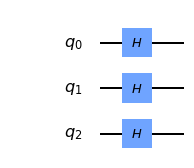

In [4]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw(output='mpl')

In [5]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# vector2latex function and use print(final_state) instead.
print(final_state)

[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


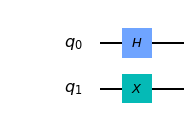

In [6]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw(output='mpl')

In [7]:
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()
print(unitary)

[[ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]]


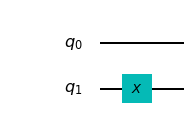

In [8]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw(output='mpl')

In [9]:
# Simulate the unitary
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()
# Display the results:
print(unitary)

[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


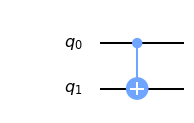

In [10]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw(output='mpl')

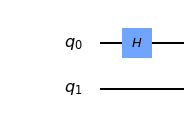

In [11]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw(output='mpl')

In [12]:
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
print(final_state)

[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]


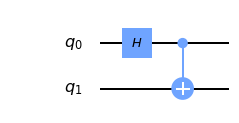

In [13]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw(output='mpl')

In [14]:
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
print(final_state)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


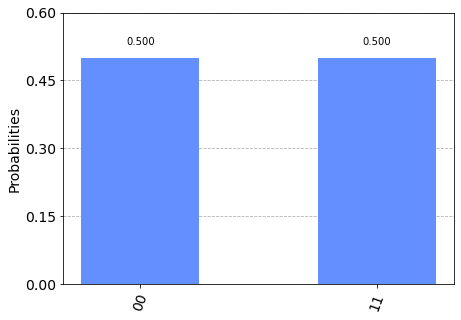

In [15]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

In [16]:
# Let's see the result:
from qiskit_textbook.tools import array_to_latex
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")

ModuleNotFoundError: No module named 'qiskit_textbook'

In [ ]:
qc = QuantumCircuit(4)
qc.cx(0, 1)
qc.z(2)
qc.x(0)
qc.h(1)
qc.cx(3, 2)
qc.cx(2, 0)
qc.cx(1, 0)
qc.i(3)
qc.h(3)
qc.x(1)
qc.cx(2, 3)
qc.draw(output='mpl')


In [ ]:
backend = Aer.get_backend("unitary_simulator")
unitary = execute(qc,backend).result().get_unitary()
# Display the results:
print(unitary)

In [ ]:
unitary.dot(3,3)

In [ ]:
unitary = np.array(unitary)
unitary

In [ ]:
thirdrow = unitary[2:3, :]

In [ ]:
thirdrow


In [ ]:
np.dot(thirdrow, thirdrow.T)

In [ ]:
fourteenth = unitary[13:14, :]

In [ ]:
fourteenth


In [ ]:
np.dot(thirdrow, fourteenth.T)

In [25]:
from math import sqrt
u = np.array([1/sqrt(2), 1/2 + (1J/2)])
u_perp = np.array([1/2 - (1J/2), -1/sqrt(2)])
print(u, u_perp, sep="\n")

[0.70710678+0.j  0.5       +0.5j]
[ 0.5       -0.5j -0.70710678+0.j ]


In [26]:
M = 1*np.outer(u,u) + 5*np.outer(u_perp, u_perp)
M

array([[ 0.5       -2.5j       , -1.41421356+2.12132034j],
       [-1.41421356+2.12132034j,  2.5       +0.5j       ]])

In [34]:
psi = (-1j)*(1/sqrt(2))*u +(-1j)*(1/2 + 1j/2)*u_perp
print(psi)

qc = QuantumCircuit(1)
qc.initialize(psi, 0)
qc.h(0)
qc.draw()

[0.-1.j 0.+0.j]


┌───────────────────┐┌───┐
q_0: ┤ initialize(-1j,0) ├┤ H ├
     └───────────────────┘└───┘

In [35]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
final_state 

array([0.-0.70710678j, 0.-0.70710678j])